# Statistics_V2
#### Purpose
This notebook will polish the previous statistics notebook using cleaned data

#### Version History 
Created: 15/05/2025, Alex Dunne Hackathon

In [2]:
#Import Required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os

## ERA 5 Data Clean

In [3]:
# Read in data
data_ERA = pd.read_csv('/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_ERA5/Data/stitchNodes/stitchNodes.csv') #Full 40 year ERA5 Climatology

In [9]:

#--------------------------------------------------------------------------------------------------#
#Duration
#--------------------------------------------------------------------------------------------------#
#Create new data frame 
df = pd.DataFrame(data_ERA)

# Calculate ETC duration (count of rows * 6 hours)
track_counts = df['track_id'].value_counts().sort_index()
duration_hours_ERA = track_counts * 6
duration_df = duration_hours_ERA.reset_index()
duration_df.columns = ['track_id', 'trk_dur'] # Sets up data frame of track id and duration

#--------------------------------------------------------------------------------------------------#
#Latitude
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_lat = pd.DataFrame(data_ERA)

# Group by trackID and calculate average latitude for ERA5 Data 
avg_lat_df_ERA = df_lat.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df_ERA.columns = ['track_id', 'avg_lat']

#--------------------------------------------------------------------------------------------------#
#Minimum MSLP - Min Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_min_depth = pd.DataFrame(data_ERA)

# Minimum Cyclone Depth
min_depth_df_ERA = df_min_depth.groupby('track_id')[' msl'].min().reset_index()
min_depth_df_ERA.columns = ['track_id', 'min_depth']

#--------------------------------------------------------------------------------------------------#
#Average MSLP - Avg Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_avg_depth = pd.DataFrame(data_ERA)

# Minimum Cyclone Depth
avg_depth_df_ERA = df_avg_depth.groupby('track_id')[' msl'].mean().reset_index()
avg_depth_df_ERA.columns = ['track_id', 'avg_depth']

#--------------------------------------------------------------------------------------------------#
#Merge into one complete dataframe 
#--------------------------------------------------------------------------------------------------#

# Merge results
ERA_df_grouped = duration_df[['track_id', 'trk_dur']] \
    .merge(avg_lat_df_ERA[['track_id', 'avg_lat']], on='track_id') \
    .merge(min_depth_df_ERA[['track_id', 'min_depth']], on='track_id') \
    .merge(avg_depth_df_ERA[['track_id', 'avg_depth']], on='track_id')


#--------------------------------------------------------------------------------------------------#
#Exclude Tropical Cyclone Tracks on Average Latitude
#--------------------------------------------------------------------------------------------------#

# Filter out rows where latitude is between -25 and 25
df_filt_ERA = ERA_df_grouped[~ERA_df_grouped['avg_lat'].between(-25, 25)]

# Reindex data frame
df_filt_ERA = df_filt_ERA.reset_index(drop=True)


#--------------------------------------------------------------------------------------------------#
#Normalise for a year
#--------------------------------------------------------------------------------------------------#

#Normalise duration to make a year 
cols_to_normalize = ['trk_dur', 'avg_lat', 'min_depth', 'avg_depth']
df_filt_ERA[cols_to_normalize] = (df_filt_ERA[cols_to_normalize] - df_filt_ERA[cols_to_normalize].mean()) / df_filt_ERA[cols_to_normalize].std()


## High Res Data Clean

In [8]:
#Read in data
data_HRes = pd.read_csv('/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_HRes/ETCs_hres_clim/stitchNodes/stitchNodes.csv') #Feb 2020 to Feb 2021 of High Res Model

In [18]:
#--------------------------------------------------------------------------------------------------#
#Duration
#--------------------------------------------------------------------------------------------------#
#Create new data frame 
df_HRes = pd.DataFrame(data_HRes)

# Calculate ETC duration (count of rows * 6 hours)
track_counts = df_HRes['track_id'].value_counts().sort_index()
duration_hours_HRes = track_counts * 6
duration_df_HRes = duration_hours_HRes.reset_index()
duration_df_HRes.columns = ['track_id', 'trk_dur'] # Sets up data frame of track id and duration

#--------------------------------------------------------------------------------------------------#
#Latitude
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_lat_HRes = pd.DataFrame(data_HRes)

# Group by trackID and calculate average latitude for ERA5 Data 
avg_lat_df_HRes = df_lat_HRes.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df_HRes.columns = ['track_id', 'avg_lat']

#--------------------------------------------------------------------------------------------------#
#Minimum MSLP - Min Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_min_depth_HRes = pd.DataFrame(data_HRes)

# Minimum Cyclone Depth
min_depth_df_HRes = df_min_depth_HRes.groupby('track_id')[' psl'].min().reset_index()
min_depth_df_HRes.columns = ['track_id', 'min_depth']

#--------------------------------------------------------------------------------------------------#
#Average MSLP - Avg Depth
#--------------------------------------------------------------------------------------------------#
# Create a new data frame for average lat 
df_avg_depth_HRes = pd.DataFrame(data_HRes)

# Minimum Cyclone Depth
avg_depth_df_HRes = df_avg_depth_HRes.groupby('track_id')[' psl'].mean().reset_index()
avg_depth_df_HRes.columns = ['track_id', 'avg_depth']

#--------------------------------------------------------------------------------------------------#
#Merge into one complete dataframe 
#--------------------------------------------------------------------------------------------------#

# Merge results
HRes_df_grouped = duration_df_HRes[['track_id', 'trk_dur']] \
    .merge(avg_lat_df_HRes[['track_id', 'avg_lat']], on='track_id') \
    .merge(min_depth_df_HRes[['track_id', 'min_depth']], on='track_id') \
    .merge(avg_depth_df_HRes[['track_id', 'avg_depth']], on='track_id')


#--------------------------------------------------------------------------------------------------#
#Exclude Tropical Cyclone Tracks on Average Latitude
#--------------------------------------------------------------------------------------------------#

# Filter out rows where latitude is between -25 and 25
df_filt_HRes = HRes_df_grouped[~HRes_df_grouped['avg_lat'].between(-25, 25)]

# Reindex data frame
df_filt_HRes = df_filt_HRes.reset_index(drop=True)


#--------------------------------------------------------------------------------------------------#
#Normalise for a year
#--------------------------------------------------------------------------------------------------#

#Normalise duration to make a year 
cols_to_normalize = ['trk_dur', 'avg_lat', 'min_depth', 'avg_depth']
df_filt_HRes[cols_to_normalize] = (df_filt_HRes[cols_to_normalize] - df_filt_HRes[cols_to_normalize].mean()) / df_filt_HRes[cols_to_normalize].std()


# Comparison Plots

#### ERA5 Data always... in BLUE, on the LEFT
#### High Res Data always... in RED, on the RIGHT

## Duration Comparison

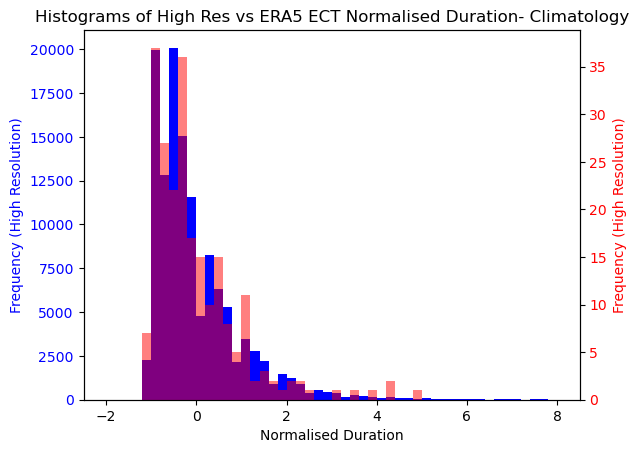

In [33]:
#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# ERA5 histogram on the left y-axis
ax1.hist(df_filt_ERA.trk_dur, bins = 50, range = (-2,8), label = 'ERA5 Frequency', color ='blue')
ax1.set_xlabel('Normalised Duration')
ax1.set_ylabel('Frequency (High Resolution)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# High Resolution histogram on the right y-axis
ax2.hist(df_filt_HRes.trk_dur, bins=50, alpha= 0.5, range = (-2,8), label='High Resolution Frequency', color='red')
ax2.set_ylabel('Frequency (High Resolution)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Histograms of High Res vs ERA5 ECT Normalised Duration- Climatology')
plt.show()

## Latitude Comparison

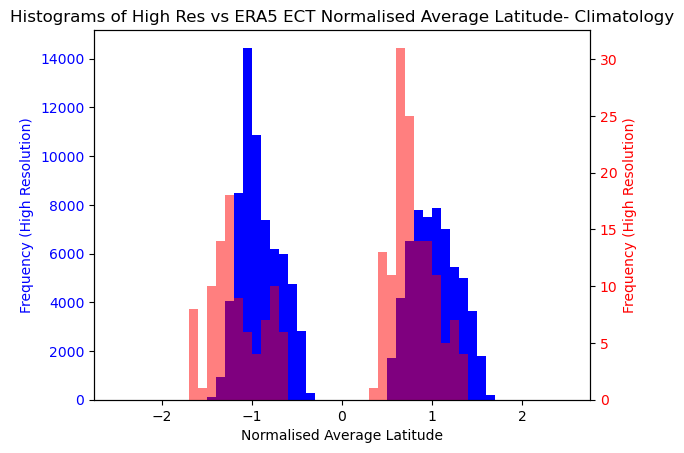

In [32]:
#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# ERA5 histogram on the left y-axis
ax1.hist(df_filt_ERA.avg_lat, bins = 50, range = (-2.5,2.5), label = 'ERA5 Frequency', color ='blue')
ax1.set_xlabel('Normalised Average Latitude')
ax1.set_ylabel('Frequency (High Resolution)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# High Resolution histogram on the right y-axis
ax2.hist(df_filt_HRes.avg_lat, bins=50, alpha= 0.5, range = (-2.5, 2.5), label='High Resolution Frequency', color='red')
ax2.set_ylabel('Frequency (High Resolution)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Histograms of High Res vs ERA5 ECT Normalised Average Latitude- Climatology')
plt.show()

## Minimum Depth Comparison

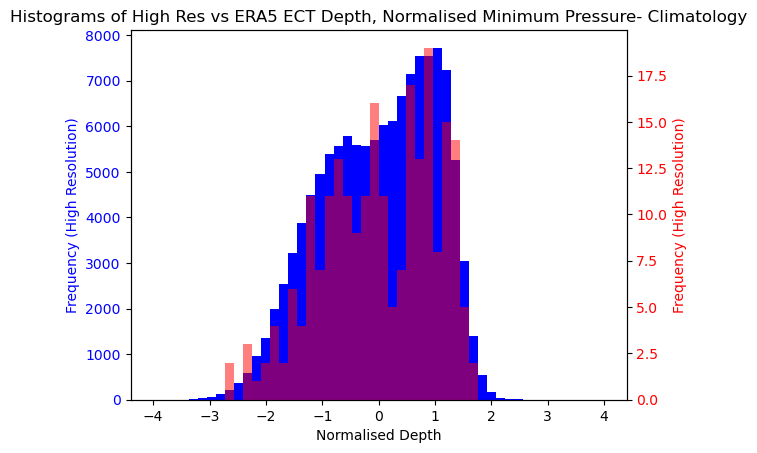

In [37]:
#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# ERA5 histogram on the left y-axis
ax1.hist(df_filt_ERA.min_depth, bins = 50, range = (-4,4), label = 'ERA5 Frequency', color ='blue')
ax1.set_xlabel('Normalised Depth')
ax1.set_ylabel('Frequency (High Resolution)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# High Resolution histogram on the right y-axis
ax2.hist(df_filt_HRes.min_depth, bins=50, alpha= 0.5, range = (-4,4), label='High Resolution Frequency', color='red')
ax2.set_ylabel('Frequency (High Resolution)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Histograms of High Res vs ERA5 ECT Depth, Normalised Minimum Pressure- Climatology')
plt.show()

## Average Depth Comparison